# Significance and Interpretation

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

## Mean and standard deviation using linear algebra

**Example:** Suppose we have a data set of two observations along one feature dimension: $x_1 = 10$ and $x_2 = 2$. We can interpret this data set as a single vector $x = (10, 2)$. We can compute the orthogonal projection of this vector onto the diagonal in $\mathbb{R}^2$ (note we have two dimensions in this vector space because there are two data entries).

In [109]:
x = np.array([10,2])
d = np.array([1,1])
print("Dot product x * d/||d|| =", x.dot(d/np.linalg.norm(d)))
print("Orthogonal projection onto d is", (d/np.linalg.norm(d)) * (x).dot(d/np.linalg.norm(d)))

Dot product x * d/||d|| = 8.48528137423857
Orthogonal projection onto d is [6. 6.]


Note that the entries in the orthogonal projection are exactly the mean of the original data. Furthermore, the standard deviation is the length of the projection vector (normalized using $\sqrt{n}$ to account for variation in the number of observations and, thus, vector space dimensions).

In [119]:
orth_proj_onto_diag = (d/np.linalg.norm(d)) * (x).dot(d/np.linalg.norm(d))
length_normalized_by_dims = np.linalg.norm(x - orth_proj_onto_diag) / np.sqrt(len(x))
print(length_normalized_by_dims)
print(x.std())

4.0
4.0


## Correlation coefficient and significance

**Definition (distribution):** A distribution over a set $S$ is a function $f: S \to \mathbb{R}$. If $S$ represents a set of possible observations, then a distribution $f$ might represent the probability that each observation will be observed, or the frequency with which that observation will occur.

**Definition ($p$-value):** Let a subset of the real number line $S \subset \mathbb{R}$ represent all possible observations that *could* be recorded, and let $f$ be a distribution over $S$ that represents the probability of seeing each of the possible observations. Given some state $s \in S$, the probability of observing $s$ is then $f(s)$. We define the <i>$p$-value</i> at the observation $s$ to be the probability of observing anything that is equal to or more extreme than $s$.

Note that the observation set $S$ in the above definition could refer to many things, including (among many others):
* a feature dimension within a data set that represents a sample of some larger population (e.g., the heights of people in a region),
* a quantitative measure of the accuracy of a model when tested on a data set, or
* the correlation between two feature dimensions.

**Example:** Assume we have a two-dimensional data set $[(x_1, y_1), ..., (x_n, y_n)]$, also represented by $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^n$. One way to obtain a range of possible correlation coefficients is to compute the correlation coefficient for all $n!$ possible permutations of the second dimension.

Informally, if the data has no correlation, then performing this permutation should not change the correlation coefficient much. On the other hand, if the data does have a correlation, we should get a distribution of correlation coefficients with respect to which the true correlation coefficient is "extreme".

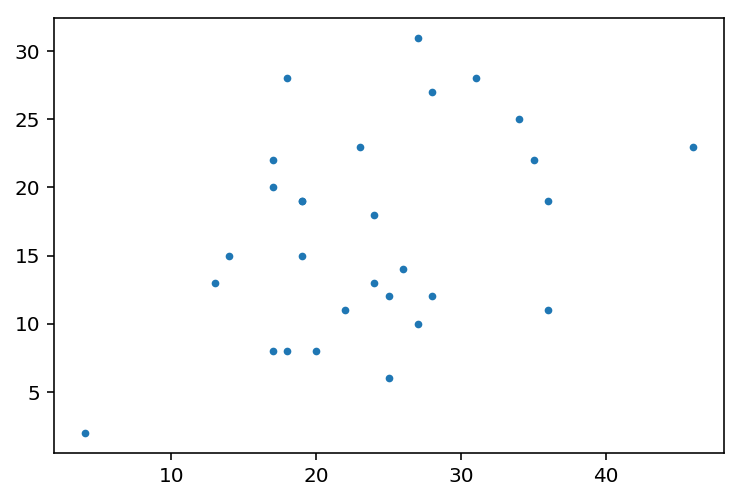

In [30]:
from random import shuffle
from math import sqrt

data = [(18, 28), (24, 18), (27, 31), (14, 15), (46, 23),
        (36, 19), (27, 10), (34, 25), (19, 15), (13, 13),
        (4, 2), (17, 20), (28, 12), (36, 11), (26, 14),
        (19, 19), (24, 13), (25, 6), (20, 8), (17, 22),
        (18, 8), (25, 12), (28, 27), (31, 28), (35, 22),
        (17, 8), (19, 19), (23, 23), (22, 11)]
x = [xi for (xi, yi) in data]
y = [yi for (xi, yi) in data]
_ = plt.scatter(x, y, s=8)

In [31]:
def permute(x):
    shuffled = [xi for xi in x]
    shuffle(shuffled)
    return shuffled

def avg(x): # Average or mean.
    return sum(x)/len(x)

def stddev(x): # Standard deviation.
    m = avg(x)
    return sqrt(sum([(xi-m)**2 for xi in x])/len(x))

def cov(x, y): # Covariance.
    return sum([(xi-avg(x))*(yi-avg(y)) for (xi,yi) in zip(x,y)])/len(x)

def corr(x, y): # Correlation coefficient.
    if stddev(x)*stddev(y) != 0:
        return cov(x, y)/(stddev(x)*stddev(y))

def p(x, y):
    c0 = corr(x, y) # The actual correlation coefficient.
    corrs = [c0] # The list of alternative correlation coefficients.
    for k in range(0, 2000):
        y_permuted = permute(y)
        corrs.append(corr(x, y_permuted))
    return len([c for c in corrs if abs(c) >= abs(c0)])/len(corrs)

print(corr(x, y))
print(p(x, y))

0.3967089924093942
0.02948525737131434


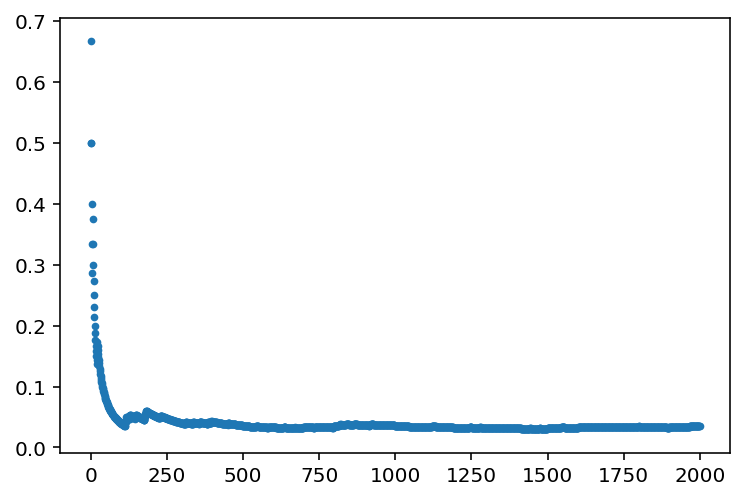

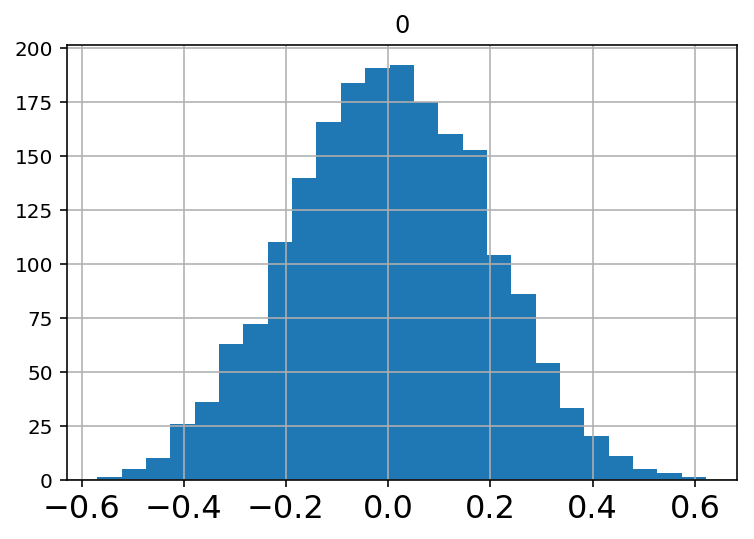

In [35]:
c0 = corr(x, y) 
corrs = [c0]
ps = []
for k in range(0, 2000):
    y_permuted = permute(y)
    corrs.append(corr(x, y_permuted))
    ps.append(len([c for c in corrs if abs(c) >= abs(c0)])/len(corrs))

_ = plt.scatter(range(len(ps)), ps, s=8) # Example of permuted data.

corrs_df = pd.DataFrame(corrs)
_ = corrs_df.hist(bins=25, xlabelsize=16)

In the above, we compute the correlation coefficient for a large number of permuted data sets. We then compute the fraction of these data sets that have a correlation coefficient with a higher absolute value than the correlation coefficient of the original data. We can call this fraction the $p$-value. Ideally, we would try all possible permutations; since this is infeasible, we can use this technique to get an approximation.

Alternatively, we can use a library to compute the same information. The `scipy.stats.pearsonr()` function will return the correlation coefficient and the $p$-value.

In [9]:
import scipy.stats
print(scipy.stats.pearsonr(x, y))

(0.3967089924093941, 0.03311538693314612)


**Example:** We consider an example with data that is highly correlated. Note how the true correlation coefficient is an outlier in the histogram.

(0.9445469577235426, 3.41915704286615e-49)


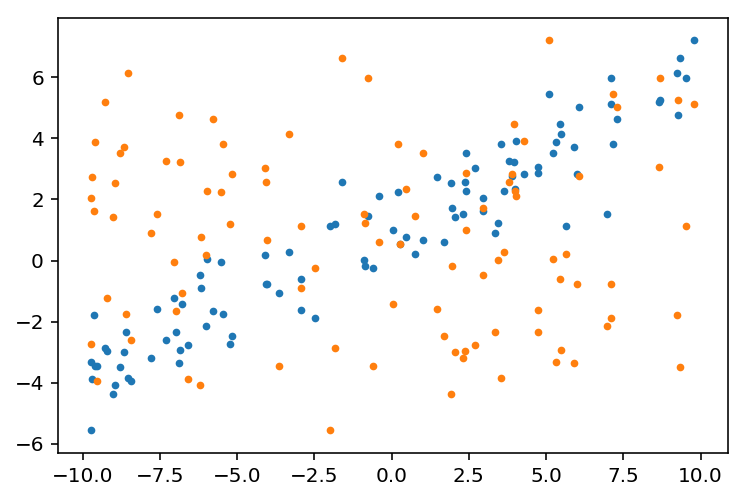

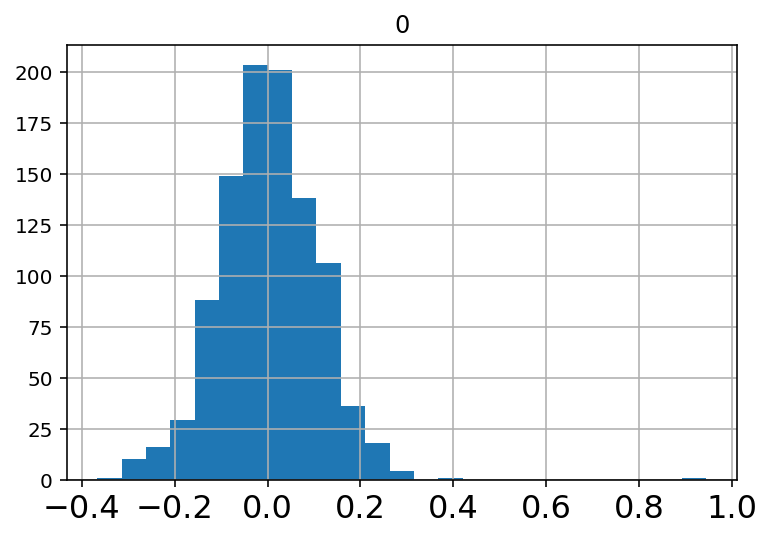

In [37]:
from random import shuffle
from math import sqrt

# Define and plot some correlated data.
line = np.array([1, 0.5])
x = -10.0 + 20.0 * np.random.random(100)
y = line[0]+(line[1]*x)+np.random.randn(100)
_ = plt.scatter(x, y, s=8)

# Plot an example of the permuted data.
y_permuted = permute(y)
_ = plt.scatter(x, y_permuted, s=8) 

# Plot the histogram from the permutation test.
c0 = corr(x, y) 
corrs = [c0]
for k in range(0, 1000):
    y_permuted = permute(y)
    corrs.append(corr(x, y_permuted))
df = pd.DataFrame(corrs)
_ = df.hist(bins=25,xlabelsize=16)

print(scipy.stats.pearsonr(x, y))

## Confidence intervals

**Example:** Suppose we use our data set of correlation coefficients from the first example in these notes. We could imagine we computed the correlation coefficient of our model output with the labeled data. We then decided to do a permutation test to assess the significance of the correlation and obtained this distribution data set.

Note, again, that we are using a data set of correlation coefficients as an example. Our distribution could just as easily be a data set of incomes of individuals, of accuracy measures of an algorithm, or any other data set of observations.

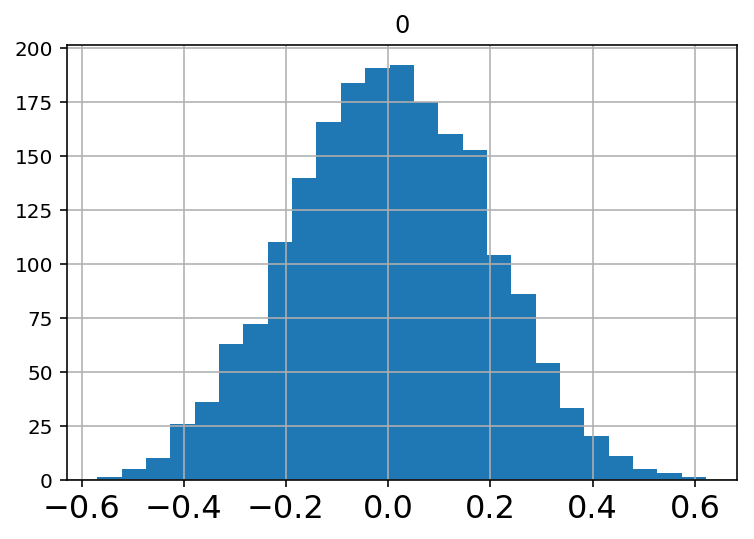

In [39]:
_ = corrs_df.hist(bins=25, xlabelsize=16)

Suppose that the data set represents *all* possible correlation coefficients. We could compute the mean of this data set. For the sake of this example, we will call this the "true mean".

In [43]:
mean_true = corrs_df.mean()
mean_true

0    0.002007
dtype: float64

However, in reality we are only going to obtain a sample from the set of correlation coefficients (e.g., when we do a permutation test). Notice that the mean of random samples of the data will not be exactly the same as the true mean. 

In [48]:
[corrs_df.sample(100).mean() for _ in range(20)]

[0   -0.005534
 dtype: float64, 0   -0.001936
 dtype: float64, 0    0.004963
 dtype: float64, 0   -0.018762
 dtype: float64, 0    0.014243
 dtype: float64, 0   -0.023711
 dtype: float64, 0    0.004478
 dtype: float64, 0    0.009107
 dtype: float64, 0    0.005644
 dtype: float64, 0    0.032257
 dtype: float64, 0    0.003943
 dtype: float64, 0   -0.000314
 dtype: float64, 0   -0.023081
 dtype: float64, 0   -0.046997
 dtype: float64, 0   -0.006728
 dtype: float64, 0    0.012576
 dtype: float64, 0    0.019486
 dtype: float64, 0   -0.007218
 dtype: float64, 0    0.028839
 dtype: float64, 0    0.026789
 dtype: float64]

We could examine the distribution of sample means.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a11898>]],
      dtype=object)

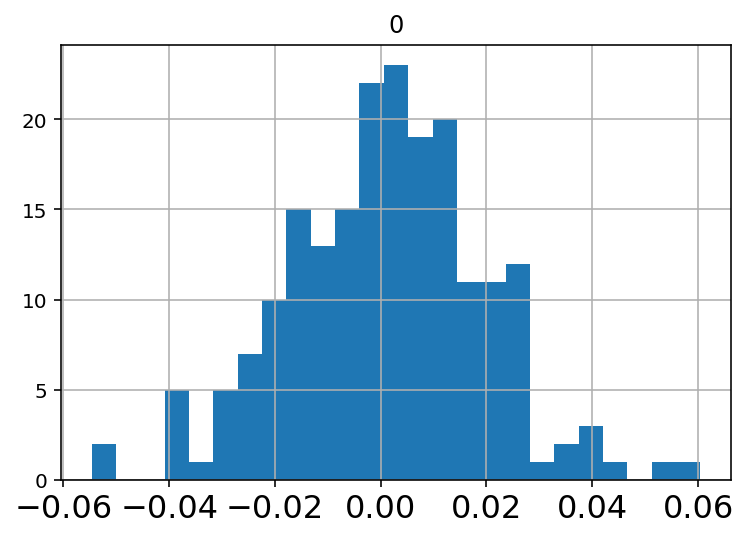

In [51]:
means = pd.DataFrame([corrs_df.sample(100).mean() for _ in range(200)])
means.hist(bins=25, xlabelsize=16)

For each sample, we can compute a confidence interval.

In [55]:
import statsmodels.stats.api as sms

sms.DescrStatsW(corrs_df).tconfint_mean(alpha = 0.05)

(array([-0.00625096]), array([0.01026513]))

Notice that for a 95% interval, we will find that the true mean falls within about 19/20 of the intervals obtained from the samples.

In [82]:
conf_ints = [sms.DescrStatsW(corrs_df.sample(100)).tconfint_mean(alpha = 0.05) for _ in range(20)]
conf_ints

[(array([-0.05498114]), array([0.02258227])),
 (array([-0.01537001]), array([0.0615265])),
 (array([-0.06357366]), array([0.01593673])),
 (array([-0.03308079]), array([0.04046078])),
 (array([-0.04660606]), array([0.02762073])),
 (array([-0.0510793]), array([0.026902])),
 (array([-0.0252887]), array([0.0444717])),
 (array([-0.00548467]), array([0.06848975])),
 (array([-0.04047032]), array([0.03025841])),
 (array([-0.04735663]), array([0.02596114])),
 (array([-0.04227486]), array([0.03011455])),
 (array([-0.03376174]), array([0.05011788])),
 (array([-0.01604528]), array([0.06346317])),
 (array([0.01455243]), array([0.09074303])),
 (array([0.00045009]), array([0.07153114])),
 (array([-0.03008194]), array([0.04612274])),
 (array([-0.06495846]), array([0.01067671])),
 (array([-0.06292015]), array([0.00634087])),
 (array([-0.04021957]), array([0.04022268])),
 (array([-0.05584894]), array([0.02530836]))]

In [81]:
[np.logical_and(lo[0] < mean_true, mean_true < hi[0]) for (lo, hi) in conf_ints]

[0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    False
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool, 0    True
 dtype: bool]

In [88]:
samples = 800
coverage = 0.90
conf_ints = [sms.DescrStatsW(corrs_df.sample(100)).tconfint_mean(alpha = (1-coverage)) for _ in range(samples)]
100*len([1 for (lo, hi) in conf_ints if np.logical_and(lo[0] < mean_true, mean_true < hi[0]).bool()])/samples

91.375